# Assignment (III)

---


##Please write your full name/names and student IDs here:




*   Full Name: Maryam Salarian
*   Student ID: 218501965
*   Full Name: Ranbir Singh Khaira
*   Student ID: 218652446



---


#Question 1. (3 points)
* **For this question, please follow the steps outlined below:**
## Part (a):

* **Data Loading:** Read the lymph dataset from your mounted Google Drive using Pandas.

* **Data Splitting:** Split the dataset randomly into a 60% training set and a 40% test set using scikit-learn's train_test_split function.

* **Handling Categorical Data:** Encode categorical attributes with one-hot encoding using pandas.get_dummies, dropping the first attribute to avoid redundancy.

* **Decision Tree Classifier (1st Experiment):** Train a Decision Tree classifier in scikit-learn on the training data, setting the splitting criterion to "entropy," and requiring a minimum of 4 samples to split an internal node. Keep other settings unchanged.

* **Reproducibility:** Set the random_state to 32 in train_test_split and DecisionTreeClassifier to make your codes reproducible.

* **Performance Evaluation (1st Experiment):** Report the Decision Tree classifier's accuracy on the test data. Also, generate a high-resolution tree visualization (use plt.figure(figsize=(12, 8), dpi=300)).





Mounted at /content/drive
Shape: (148, 19)
Training set: (88, 18), Test set: (60, 18)
Remaining object columns: []

Accuracy Score (a): 0.8833333333333333


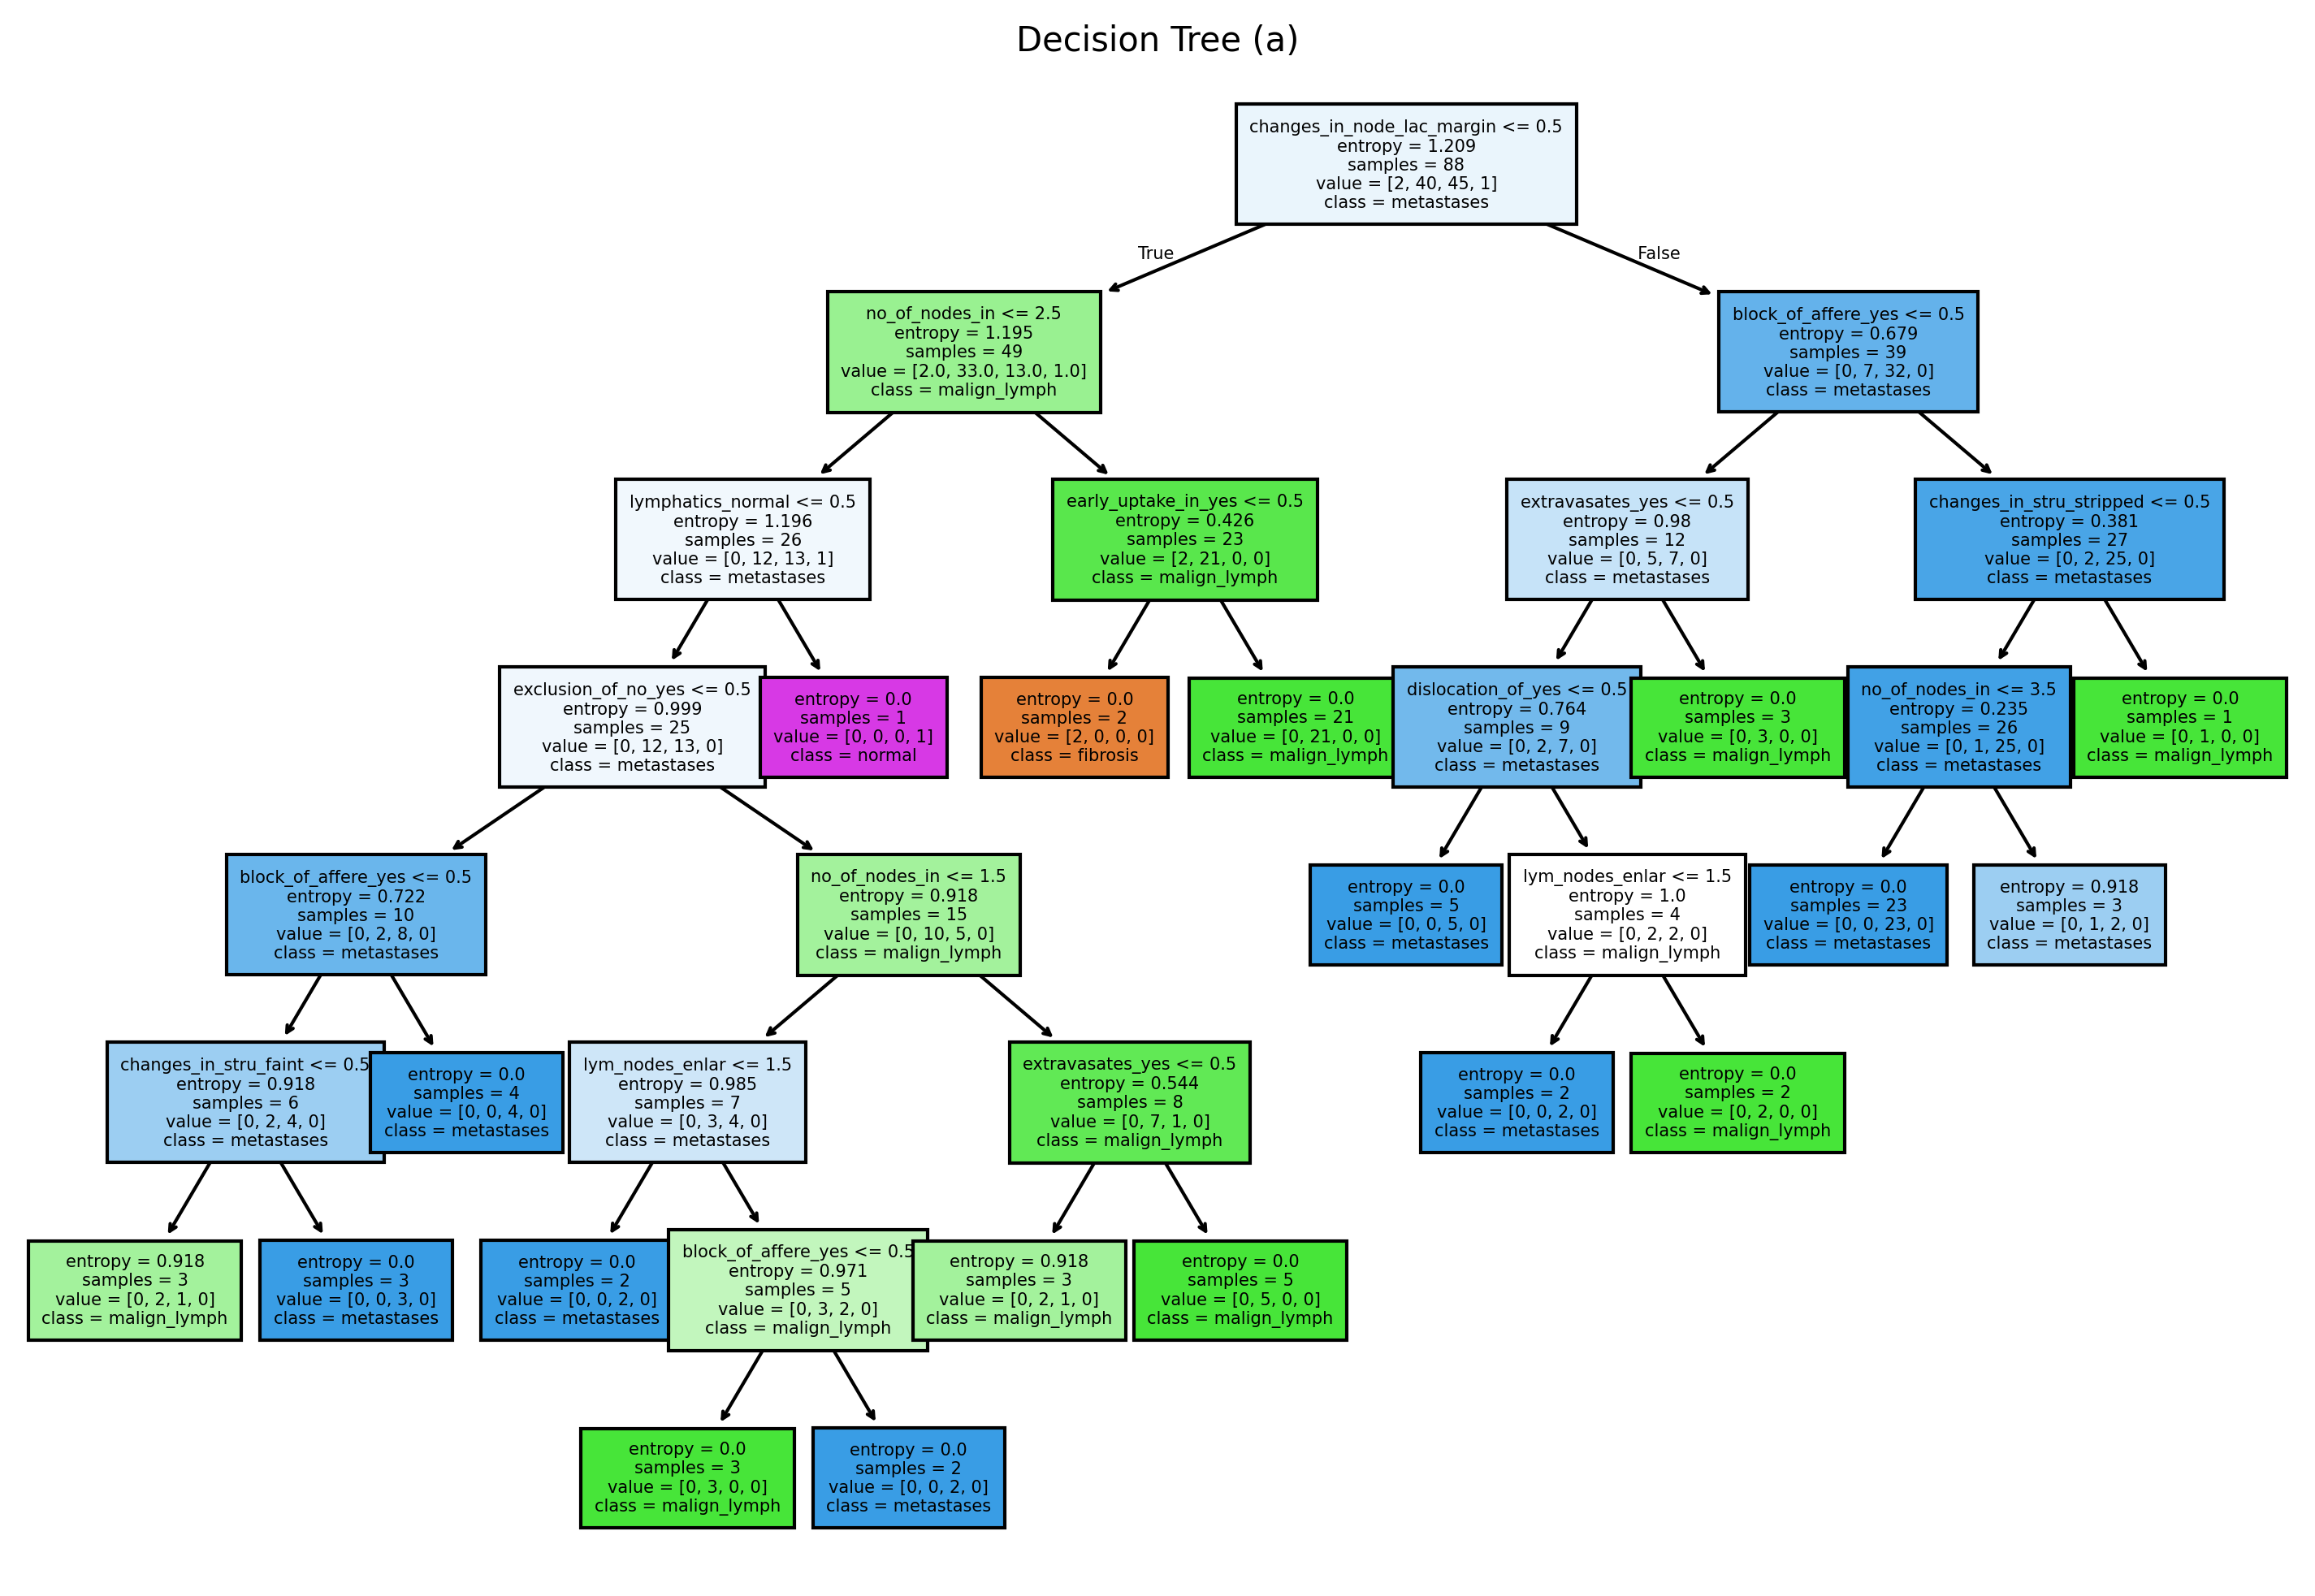

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/EECS4412/data/lymph.csv")  # Load your dataset

#.............................................................................
# write the rest here

print('Shape:', data.shape)
# print(data.head())

# remove the reduncant '' around the attr names
data.columns = data.columns.str.replace("'", "").str.replace('"', '').str.strip()

# y is the dependent attr, X is all the feature attrs (does not include the class attr)
X = data.drop('class', axis=1)
y = data['class']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32)
print(f'Training set: {X_train.shape}, Test set: {X_test.shape}')

# encode symbolic values into numeric values
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# align training and testing cols after encoding, in case generated cols are not identical
# common issue when using panda's get_dummies
# if col in train, but not in test, add in test and fill values with 0
# if col in test, but not in train, remove from test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# cruicial to check for values of type obj since numeric, bool, ... types
# may not behave as they should in nature and must be handled (as mentioned in Q2)
print('Remaining object columns:', X_train.select_dtypes('object').columns.tolist())

# create the decision tree model and train it
clf_a = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=32)
clf_a.fit(X_train, y_train)
y_pred = clf_a.predict(X_test)

# compute the accuracy score
accuracy_a = accuracy_score(y_test, y_pred)
print('\nAccuracy Score (a):', accuracy_a)

# show the decision tree
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(clf_a, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in clf_a.classes_], fontsize=5)
plt.title('Decision Tree (a)', fontsize=10)
plt.show()

#.............................................................................


## Part (b):


Modify the minimum samples required for splitting to 32 and re-run the experiment. Report the accuracy of the Decision Tree classifier with the modified parameter and create a visualization of the tree. Discuss the differences between the two Decision Trees and their respective results, highlighting how changing the minimum samples for splitting affects the tree structure and performance.



Accuracy: 0.7666666666666667


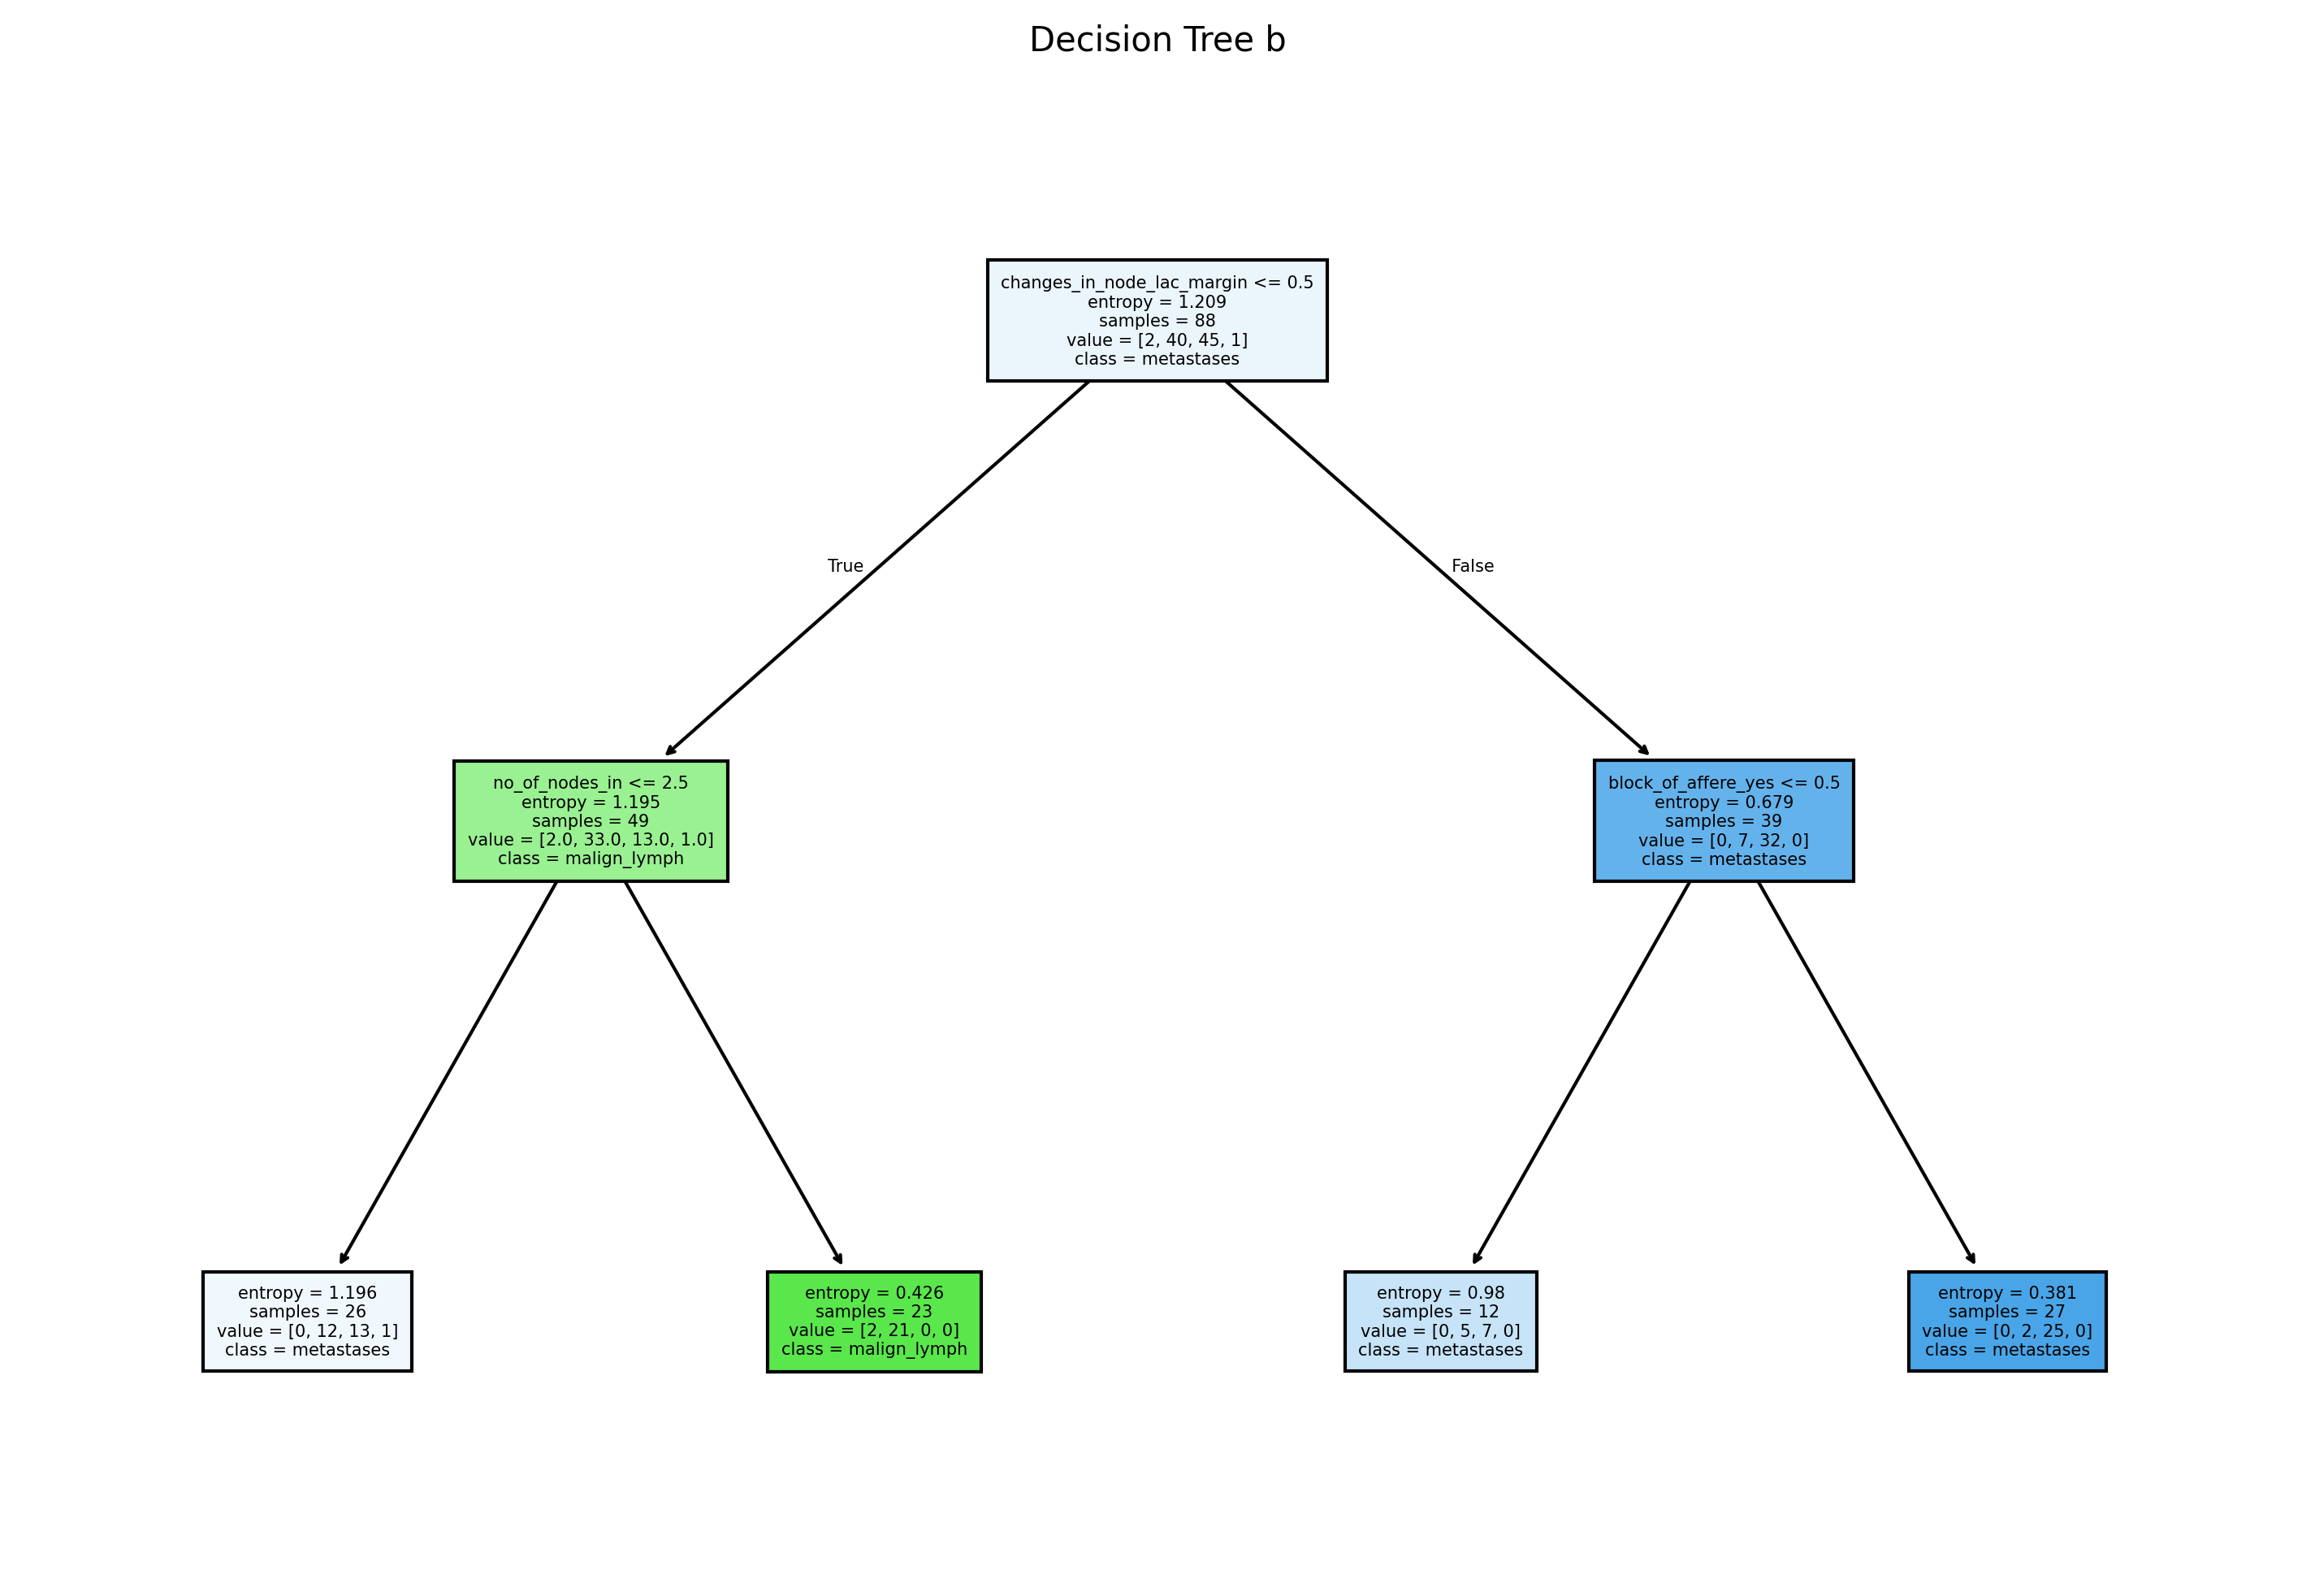

In [4]:

#.............................................................................
# write the rest here

# create the model, train it, and compute accuracy score
clf_b = DecisionTreeClassifier(criterion='entropy', min_samples_split=32, random_state=32)
clf_b.fit(X_train, y_train)
y_pred_b = clf_b.predict(X_test)
accuracy_b = accuracy_score(y_test, y_pred_b)
print('\nAccuracy:', accuracy_b)

# show the decision tree
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(clf_b, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in clf_b.classes_], fontsize=5)
plt.title('Decision Tree b', fontsize=10)
plt.show()

#.............................................................................




---


**Put your discussion here**

A decision tree uses the minimum number of samples required to split an internal node parameter to help find pure nodes. It splits nodes to aim for a node where most of the samples in the node are from the same class, so that classification using the tree is accurate. When a node's number of samples is below this minimum threshold, it cannot be split, and is deemed a leaf node. Then when using the decision tree to classify a sample, when this node is reached, the class of sample is determined. This minimum directly affects the complexity and performance of generated decision trees.
  
  This effect is observed in the examples above. When the minimum number of samples required for splitting is 4, the tree is a lot more complex and deep, than when the minimum is set to 32. Furthermore, the accuracy evidently declines as the minimum restriction is raised, with the accuracy falling from ~0.883 to ~0.767.

  The lower the minimum restriction is set, the tree grows deeper and more complex as nodes are split more often, creating more nodes than would be created otherwise. This can lead to an increase in accuracy as each leaf is more pure and therefore each class is more effectively determined. There is however, a risk of overfitting the training data, as the tree can become so accurate on the training data, that it becomes *only* accurate on it.

  On the other hand, when the minimum threshold is increased, the tree makes fewer splits and therefore nodes, creating leaves earlier, which in turn creates a shallower, less complex tree. This tree can be less accurate as each leaf is likely to be less pure than it would be otherwise. However, since the tree is less complex, it does not overfit to training data and is more generalizable.

  This analysis highlights the importance of balancing the accuracy of a decision tree with it's generalizability to other instances of data.
  







---


# Question 2. (5 points)
##Part (a):
*  Write a Python function named "preprocess" that preprocesses and prepares
datasets for machine learning. It must take a training dataset and an optional test dataset as input. The code must first identify categorical and numerical attributes, then handle missing values by imputing the mean for numerical attributes and the most frequent value for categorical attributes. It is worth noting that to determine if an attribute is numerical, the process should involve checking its data type and potentially examining the number of unique values. This is necessary because an attribute may appear to have an "object" data type but could, in fact, be numerical in nature.

*  Subsequently, the "preprocess" code must standardize the numerical attributes by removing the mean and scaling to unit variance., and encodes categorical attributes using one-hot encoding.

*  If a test dataset is provided, it must undergo the same preprocessing steps, ensuring that the imputation for missing values and data scaling are performed based on the values obtained from the training dataset, thus maintaining consistency between the two datasets.

*  At the end, the function must return the preprocessed training and test datasets as (X_train, y_train, X_test, y_test) tuple if the test dataset exists. Otherwise it must return (X_train, y_train). X stands for independent processed attributes, while y indicates the class attribute.

In [5]:
from os import error
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#...............................................................................
# helper function defined outside the scope of preprocess
# objective is to clean up strings that are in numeric form
# remove currency symbols, percentage signs, parentheses, commas, spaces, etc.
def _clean_strings(series):
  # convert to str first
  s = series.astype(str).str.strip()
  s = series.str.replace(r'[\$€£₹¥¢]', '', regex=True)
  s = s.str.replace(r'%', '', regex=True)
  s = s.str.replace(r'[()]', '', regex=True)
  s = s.str.replace(r'(?<=\d)[,\s](?=\d)', '', regex=True)
  s = s.str.replace(r'[^0-9.\-eE]', '', regex=True)
  s = s.str.strip()
  return s
#...............................................................................

def preprocess(train_df, test_df=None):
  #.............................................................................
  # write your codes here

  # this function must be generic enough to apply to different datasets
  # name of the cols or other characteristics of the dataset cannot be assumed
  # only assumption on the dataset: last col is the class attr

  # define X and y, given the assumption above:
  # iloc[rows, cols]
  # copy() used to preserve the original train_df
  X_train = train_df.iloc[:, :-1].copy() # all rows, all cols except the last one
  y_train = train_df.iloc[:, -1].copy() # all rows, only the last col (class attr)

  # if test_df exists, apply the above
  if test_df is not None:
      X_test = test_df.iloc[:, :-1].copy()
      y_test = test_df.iloc[:, -1].copy()
  else:
      X_test = None
      y_test = None

  # replace '?' with NaN globally
  # TODO: store in separate variable ????
  X_train.replace('?', np.nan, inplace=True)
  if test_df is not None:
      X_test.replace('?', np.nan, inplace=True)

  # identify numerical and categorical attrs:
  # as mentioned, some numerical values may be presented in object data type
  # if an attr has many unique values, it probably is a numerical attr
  numerical_attrs = []
  categorical_attrs = []
  for col in X_train.columns:
      col_data = X_train[col]
      # if type is number -> numerical
      if np.issubdtype(col_data.dtype, np.number):
          numerical_attrs.append(col)
          continue
      # if type is datatime -> categorical
      if np.issubdtype(col_data.dtype, np.datetime64):
          categorical_attrs.append(col)
          continue
      # if type is bool -> categorical
      if col_data.dtype == bool:
          categorical_attrs.append(col)
          continue
      # clean the data and convert data to num, then
      # 1. find unique values
      # 2. find what fraction of values successfully converet to num
      # if 1 and 2 are above a certain threshold, treat col as numeric
      if col_data.dtype == object or pd.api.types.is_string_dtype(col_data.dtype):
          data_cleaned = _clean_strings(col_data)
          unique_vals = data_cleaned.nunique(dropna=True)
          data_converted_to_num = pd.to_numeric(data_cleaned, errors='coerce')
          valid_numeric_ratio = data_converted_to_num.notna().mean()
          if valid_numeric_ratio > 0.9 and unique_vals > 10:
            numerical_attrs.append(col)
          else:
            categorical_attrs.append(col)
          continue
      # fallback if no other condition met
      categorical_attrs.append(col)

  # after identifying numerical attr, convert them to num
  # TODO: store in separate variables to preserve the original ????
  X_train[numerical_attrs] = X_train[numerical_attrs].apply(pd.to_numeric, errors='coerce')
  if test_df is not None:
      X_test[numerical_attrs] = X_test[numerical_attrs].apply(pd.to_numeric, errors='coerce')

  # handle missing values:
  # to keep the original X_train, we assign the imputed version in a different variable
  numerical_imp = SimpleImputer(strategy='mean')
  categorical_imp = SimpleImputer(strategy='most_frequent')
  X_train_num = numerical_imp.fit_transform(X_train[numerical_attrs])
  X_train_cat = categorical_imp.fit_transform(X_train[categorical_attrs])

  # if test_df exists, apply the above
  # use transform instead of fit_transform to use the trained values
  if test_df is not None:
      X_test_num = numerical_imp.transform(X_test[numerical_attrs])
      X_test_cat = categorical_imp.transform(X_test[categorical_attrs])

  # standardize num attrs:
  # computed as (x-mean)/std
  scaler = StandardScaler()
  X_train_num_scaled = scaler.fit_transform(X_train_num)

  # if train_df exists
  if test_df is not None:
      X_test_num_scaled = scaler.transform(X_test_num)

  # encode cat attrs:
  # panda's get_dummies used in Q1 is not as reliable with keeping the attrs consistent
  # hence the alignment issue we had to handle in Q1
  # sklearn's OneHotEncoder() is more reliable and reproducable
  # FUN FACT - "drop first" removes one of the generated columns such that,
  # for instance: A1 has values a and b. instead of creating both A1_a and A1_b,
  # one col will be removed (A1_a has fewer records) since it is implied that:
  # if A1_b is 0 => then, A1_a is 1.
  encoder = OneHotEncoder(sparse_output=False, drop='first')
  X_train_cat_encoded = encoder.fit_transform(X_train_cat)

  # if test_df exists
  if test_df is not None:
      X_test_cat_encoded = encoder.transform(X_test_cat)

  # combine cat and num attrs and return:
  # encoded cat attrs are in the 0/1 form, no need to standardize
  # numpy's hstack used to bring cols together side by side
  X_train_final = np.hstack((X_train_num_scaled, X_train_cat_encoded))
  if test_df is not None:
    X_test_final = np.hstack((X_test_num_scaled, X_test_cat_encoded))

  # TODO: INVESTIGATION - REMOVE LATER
  # Combine back into DataFrame for inspection
  # encoded_feature_names = encoder.get_feature_names_out(categorical_attrs)
  # all_feature_names = list(numerical_attrs) + list(encoded_feature_names)
  # X_test_df_table = pd.DataFrame(X_test_final, columns=all_feature_names)

  # pd.set_option('display.max_rows', None)      # Show all rows
  # pd.set_option('display.max_columns', None)   # Show all columns
  # pd.set_option('display.width', None)         # Auto width (no wrapping)
  # pd.set_option('display.max_colwidth', None)  # Show full column content

  # print(X_test_df_table.head())

  # pd.reset_option('display.max_rows')
  # pd.reset_option('display.max_columns')
  # pd.reset_option('display.width')
  # pd.reset_option('display.max_colwidth')

  #.............................................................................
  if test_df is not None:
      return X_train_final, y_train, X_test_final, y_test
  else:
      # If no test dataset is provided, return only the preprocessed training dataset
      return X_train_final, y_train


## Part (b)
In this task, your objective is to assess the performance of various machine learning classifiers for a credit classification problem. To ensure result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100. Finally, report the accuracy achieved on the test dataset.

In [16]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# # Load the training and test datasets
credit_train = pd.read_csv("/content/drive/MyDrive/EECS4412/data/credit-a-train.csv")
credit_test = pd.read_csv("/content/drive/MyDrive/EECS4412/data/credit-a-test.csv")

# Preprocess the datasets and split them into features (X) and target (y)
X_train, y_train, X_test, y_test = preprocess(credit_train, credit_test) # function comes from question 2
#...............................................................................
# write your codes here

# TODO: INVESTIGATION - REMOVE LATER
# with pd.option_context('display.max_rows', None):
#     print(credit_test)
#     print(X_test)
#     print(y_test)

print('Shape credit_train:', credit_train.shape)
print('Shape X_train:', X_train.shape)
print(credit_train.head())
print('Shape credit_test:', credit_test.shape)
print('Shape X_test:', X_test.shape)
print(credit_test.head())

# Decision Tree Classifier:
# random_state = 42
# train
clf_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
# test
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print('\nAccuracy Score (Decision Tree Classifier):', accuracy_a)

# kNN, k = 1:
# train
clf_knn1 = KNeighborsClassifier(n_neighbors=1)
clf_knn1.fit(X_train, y_train)
y_pred_knn1 = clf_knn1.predict(X_test)
# test
accuracy_knn1 = accuracy_score(y_test, y_pred_knn1)
print('\nAccuracy Score (kNN, k=1):', accuracy_knn1)

# kNN, k = 3:
# train
clf_knn3 = KNeighborsClassifier(n_neighbors=3)
clf_knn3.fit(X_train, y_train)
y_pred_knn3 = clf_knn3.predict(X_test)
# test
accuracy_knn3 = accuracy_score(y_test, y_pred_knn3)
print('\nAccuracy Score (kNN, k=1):', accuracy_knn3)

# Guassian Naive Bayes:
# train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred_gnb = clf_gnb.predict(X_test)
# test
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print('\nAccuracy Score (Guassian NB):', accuracy_gnb)

# logistic regression:
# train
# max_iter = 1000 (from MLP settings)
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
# test
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('\nAccuracy Score (Logistic Regression):', accuracy_lr)

# MLP nueral network
# random_state = 42
# 2 hidden layers, 100 and 50 hidden units
# max_iter = 1000
#train
clf_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf_mlp.fit(X_train, y_train)
y_pred_mlp = clf_mlp.predict(X_test)
# test
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print('\nAccuracy Score (MLP):', accuracy_mlp)

# Random Forest
# random_state = 42
# number of trees = 100
# train
clf_forest = RandomForestClassifier(n_estimators=100, random_state=42)
clf_forest.fit(X_train, y_train)
y_pred_forest = clf_forest.predict(X_test)
# test
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print('\nAccuracy Score (Random Forest):', accuracy_forest)

#...............................................................................

Shape credit_train: (552, 16)
Shape X_train: (552, 37)
  A1     A2     A3 A4 A5 A6 A7     A8 A9 A10  A11 A12 A13  A14    A15 class
0  a  58.67  4.460  u  g  q  h  3.040  t   t    6   f   g   43    560     +
1  b  33.17  1.040  u  g  r  h  6.500  t   f    0   t   g  164  31285     +
2  b  29.92  1.835  u  g  c  h  4.335  t   f    0   f   g  260    200     +
3  b  28.25  0.875  u  g  m  v  0.960  t   t    3   t   g  396      0     +
4  b  23.25  1.000  u  g  c  v  0.835  t   f    0   f   s  300      0     +
Shape credit_test: (138, 16)
Shape X_test: (138, 37)
  A1     A2      A3 A4 A5 A6 A7     A8 A9 A10  A11 A12 A13  A14   A15 class
0  b  30.83   0.000  u  g  w  v  1.250  t   t    1   f   g  202     0     +
1  b  32.08   4.000  u  g  m  v  2.500  t   f    0   t   g  360     0     +
2  b  22.08   0.830  u  g  c  h  2.165  f   f    0   t   g  128     0     +
3  b  36.67   4.415  y  p  k  v  0.250  t   t   10   t   g  320     0     +
4  b     25  11.250  u  g  c  v  2.500  t   t   17   f  



---


**Put your discussion here**


Discuss here.




---


# Question 3. (4 points)
## Part (a)
 Use the ionosphere dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Load the Ionosphere dataset and preprocess it
ionosphere_dataset = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/ionosphere.csv")
X, y = preprocess(ionosphere_dataset)
#.............................................................................
# write your codes here









#.............................................................................

## Part (b)
 Write a piece of code to perform feature selection using mutual information scores (mutual_info_classif in sklearn) on the processed ionosphere dataset (X) with its corresponding class labels (y). Your code must calculate these scores and then must select the top 5 attributes with the highest scores. Report what are these 5 selected attributes.

In [ ]:
# Import the necessary library for feature selection
from sklearn.feature_selection import mutual_info_classif
#.............................................................................
# write your codes here









#.............................................................................

##Part (c)
Using only the top five attributes selected by the previous feature selection method, repeat k-fold validation to report the classification errors for each classifier. Then, discuss whether the results for each classifier have improved and explore the potential reasons behind any changes.

In [ ]:
# Create a new dataset (X_low_dim) with only the selected attributes
X_low_dim = X[selected_attrs]

#.............................................................................
# write your codes here











#.............................................................................



---


**Put your discussion here**


Discuss here.




---


 # Question 4. (4 points)
 Report the classification error rate on each data set and the average classification error rate of each method over all the data sets. Rank the methods according to their average classification error rate. For the top two methods (with the lowest average error rates), are their average error rates significantly different? Why? Comparing the method with the lowest average error rate and the one with the highest error rate, are their error rates significantly different? Why? Briefly discuss the results.

 (or result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. Configure the MLP with two hidden layers having 100 and 50 hidden units, and set max_iter to 1000.)


In [ ]:
#.............................................................................
# write your codes here















#.............................................................................



---


**Put your discussion here**


Discuss here.




---


#Question 5. (14 points)

In [ ]:
#Please include your code for this section below. You may need to define various functions,
#such as a preprocessing function, and incorporate them into your code.






























**For question 5, your detailed report should be presented in a separate PDF file.**